<a href="https://colab.research.google.com/github/eldoabrahm/Moire-Pattern-Detection/blob/master/MaskTrack-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MaskTrack

### Google Colab Setup

In [ ]:
# !git clone https://github.com/bhavyaajani/DAVIS2017
!pwd
!pip install keras_segmentation

/content/gdrive/My Drive/stryker/stryker-assignemnet


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd gdrive/My Drive/stryker/stryker-assignemnet
! git pull

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/My Drive/stryker/stryker-assignemnet'
/content/gdrive/My Drive/stryker/stryker-assignemnet
Already up to date.


### Python Imports

In [ ]:
# Define your python imports
import glob
import cv2
import numpy as np

### Definitions

In [ ]:
#External directories defined here!
root_data_dir = 'DAVIS2017'

In [ ]:
imgList = sorted(glob.glob("Train/**"))
annList = sorted(glob.glob("Train_Annotated/**"))
print(imgList)
print(annList)

['Train/bear', 'Train/bike-packing', 'Train/blackswan', 'Train/bmx-bumps', 'Train/bmx-trees', 'Train/boat', 'Train/boxing-fisheye', 'Train/breakdance', 'Train/breakdance-flare', 'Train/bus', 'Train/camel', 'Train/car-roundabout', 'Train/car-shadow', 'Train/car-turn', 'Train/cat-girl', 'Train/classic-car', 'Train/color-run', 'Train/cows', 'Train/crossing', 'Train/dance-jump', 'Train/dance-twirl', 'Train/dancing', 'Train/disc-jockey', 'Train/dog', 'Train/dog-agility', 'Train/dog-gooses', 'Train/dogs-jump', 'Train/dogs-scale', 'Train/drift-chicane', 'Train/drift-straight', 'Train/drift-turn', 'Train/drone', 'Train/elephant', 'Train/flamingo', 'Train/goat', 'Train/gold-fish', 'Train/hike', 'Train/hockey', 'Train/horsejump-high', 'Train/horsejump-low', 'Train/india', 'Train/judo', 'Train/kid-football', 'Train/kite-surf', 'Train/kite-walk', 'Train/koala', 'Train/lab-coat', 'Train/lady-running', 'Train/libby', 'Train/lindy-hop', 'Train/loading', 'Train/longboard', 'Train/lucia', 'Train/mallar

## Common Code

In [ ]:
# Implement common (re-usable) functions for all 3 tasks in next few cells

## Task 1 - Base Network

In [ ]:
# Write APIs to load data for Task 1 and split into Train/Validation set


In [ ]:
# Unit tests to ensure data load for Task 1 is correct (display few of the samples)

In [ ]:
# Implement DL algorithm for Task 1 in next few cells

#### Test keras-segmentation

In [ ]:
# import tensorflow as tf
# import keras
# print(tf.__version__)
# print(keras.__version__)
import keras_segmentation
from keras_segmentation.pretrained import pspnet_50_ADE_20K , pspnet_101_cityscapes, pspnet_101_voc12



# model = pspnet_50_ADE_20K() # load the pretrained model trained on ADE20k dataset
# model = pspnet_101_cityscapes() # load the pretrained model trained on Cityscapes dataset
model = pspnet_101_voc12() # load the pretrained model trained on Pascal VOC 2012 dataset

out = model.predict_segmentation(
    inp="00000.jpg",
    out_fname="out.png"
)
model.summary()
model.save('my_model.h5')

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 473, 473, 3) 0                                            
__________________________________________________________________________________________________
conv1_1_3x3_s2 (Conv2D)         (None, 237, 237, 64) 1728        input_2[0][0]                    
__________________________________________________________________________________________________
conv1_1_3x3_s2_bn (BatchNormali (None, 237, 237, 64) 256         conv1_1_3x3_s2[0][0]             
__________________________________________________________________________________________________
activation_109 (Activation)     (None, 237, 237, 64) 0           conv1_1_3x3_s2_bn[0][0]          
____________________________________________________________________________________________

In [ ]:
from keras.models import load_model
from keras_segmentation.models._pspnet_2 import Interp
from matplotlib import pyplot as plt

model = load_model('my_model.h5', custom_objects={'Interp': Interp})

# evaluating the model 
# print(model.evaluate_segmentation(inp_images_dir='DAVIS2017/train1/bear'  , annotations_dir='DAVIS2017/gt/bear') )

Train/bear/00070.jpg


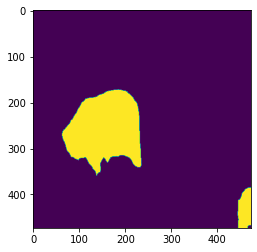

In [ ]:
idx = 70
imgList = cv2.resize(cv2.imread(fileNames[idx]), (473,473)).reshape(1, 473, 473, 3)


out = model.predict(imgList)
out = (out.reshape((473,  473, 21)).argmax(axis=2) > 0)*1
print(fileNames[idx])
plt.imshow(out)


In [ ]:
#TODO
# Reshape the output layer of the model to get same dimension as the input image. THe current output layer is
#activation_219 (Activation)     (None, 223729, 21)   0           reshape_1[0][0] 

In [ ]:
# Document quality metric for Task 1 on validation set (display few of the results as well)

In [ ]:
import numpy as np

EPS = 1e-12

def getIOU(gt, pr, n_classes=2):
    class_wise = np.zeros(n_classes)
    for cl in range(n_classes):
        intersection = np.sum((gt == cl)*(pr == cl))
        union = np.sum(np.maximum((gt == cl), (pr == cl)))
        iou = float(intersection)/(union + EPS)
        class_wise[cl] = iou
    return class_wise

Train_Annotated/bear/00070.png


array([0.96978097, 0.77724359])

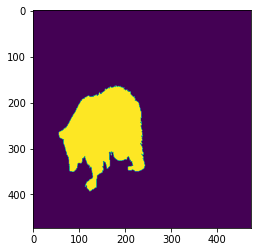

In [ ]:
ann = (cv2.cvtColor(cv2.resize(cv2.imread(annotationNames[idx]), (473,473)), cv2.COLOR_BGR2GRAY) > 0)*1
print(annotationNames[idx])
plt.imshow(ann)
getIOU(ann, out)

In [ ]:
# Save trained model for Task 1 (Ensure to download this to your local system / google drive for persistance storage)

## Task 2 - Offline Training

In [ ]:
# Load saved model from Task 1

In [ ]:
# Write APIs to load data for Task 2 and split into Train/Validation set

Number of samples: 0


In [ ]:
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(473,473), n_channels=3,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()
        self.imgList = imgList
        self.annList = annList
        sef.cnt = 0

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.imgList) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, batch_size):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X1 = np.empty((self.batch_size, *self.dim, self.n_channels))
        X2 = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size, *self.dim, self.n_channels), dtype=int)

        # Generate data
        for i in range(self.batch_size):

            X1[i,] = cv2.imread(self.imgList[self.cnt][i+1]) # T - image
            X2[i,] = cv2.imread(self.annList[self.cnt][i]) # T-1 - annotation

            # Store class
            y[i] = cv2.imread(self.annList[self.cnt][i+1]) # T - annotation

        return [X1,X2], y

In [ ]:
# Unit tests to ensure data load for Task 2 is correct (display few of the samples)

In [ ]:
# Implement DL algorithm for Task 2 in next few cells

In [ ]:
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Reshape, MaxPooling3D, Maximum, Softmax
import tensorflow as tf
import keras

maskInput = keras.Input(shape=(model.input_shape))
reshape1 = Reshape((model.input_shape[1], model.input_shape[2], 21, 1))(model.layers[-1].output)
maxPool = MaxPooling3D((1,1,21))(reshape1)
merge = Maximum()([maxPool, maskInput])
out = Softmax()(merge)

# maskInput = 
modelT2 = Model(inputs=[model.inputs, maskInput], outputs=out)

(473, 473)
Train/bear/00070.jpg


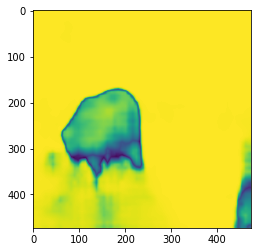

In [ ]:

out = model1.predict(imgList).reshape((473,473))
print(out.shape)
print(fileNames[idx])
plt.imshow(out)

In [ ]:
# Document quality metric for Task 2 on validation set (display few of the results as well)
print(model.input_shape)

(None, 473, 473, 3)


In [ ]:
# Save trained model for Task 2 (Ensure to download this to your local system / google drive for persistance storage)

## Task 3 - Online Training

In [ ]:
# Load saved model from Task 2

In [ ]:
# Write APIs to perform online training for given test data in next few cells

In [ ]:
# Implement a top level function for inference on test data
# Input 1: Path to directory containing 'N' ordered images for given test sample
# Input 2: Path to directory containing corresponding 'N' masks with filename as that of images 
#          Here, use only mask[0] with images for online training where as mask[1:N] are ground truth for evaluating predictions
# Output 1: Quality metric for every single mask prediction from time (t=1 to t = T) and average for the same
# Output 2: Display all predicted masks along with original RGB image and ground truth masks in order

## Variants - Extra Credit